In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot 

#for offline plotting
from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot

init_notebook_mode(connected = True)

In [2]:
tesla = pd.read_csv("tesla.csv")

In [3]:
tesla.head(5)

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2,2010-01-07,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,3,2010-02-07,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,4,2010-06-07,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2193 non-null   int64  
 1   Date        2193 non-null   object 
 2   Open        2193 non-null   float64
 3   High        2193 non-null   float64
 4   Low         2193 non-null   float64
 5   Close       2193 non-null   float64
 6   Adj Close   2193 non-null   float64
 7   Volume      2193 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 137.2+ KB


In [5]:
tesla['Date'] = pd.to_datetime(tesla['Date'])

In [6]:
tesla['Date'].min() , tesla['Date'].max()

(Timestamp('2010-01-07 00:00:00'), Timestamp('2019-12-03 00:00:00'))

In [4]:
tesla['Date'].max() - tesla['Date'].min()

Timedelta('3617 days 00:00:00')

In [8]:
tesla.columns

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')

In [7]:
tesla.drop('Unnamed: 0' , axis = 1 , inplace = True)

In [8]:
tesla.head() 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-01-07,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-02-07,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-06-07,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [9]:
tesla.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2188,2019-11-03,283.519989,291.279999,280.500000,290.920013,290.920013,7392300
2189,2019-12-03,286.489990,288.070007,281.059998,283.359985,283.359985,7504100
2190,2019-03-13,283.899994,291.989990,282.700012,288.959991,288.959991,6844700
2191,2019-03-14,292.450012,295.390015,288.290009,289.959991,289.959991,7074200
2192,2019-03-15,283.510010,283.723999,274.399994,275.429993,275.429993,14758243


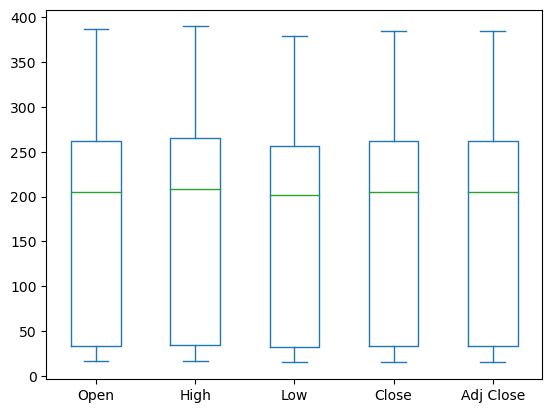

In [10]:
tesla[['Date' , 'Open' , 'High' , 'Low' , 'Close' , 'Adj Close']].plot(kind = 'box');

In [15]:
layout = go.Layout(
          title = 'Stock Prices of Tesla for the past 10 years',
          xaxis = dict(title = 'Day' , 
                       titlefont = dict(family = 'Courier New , monospace' , 
                                        size = 18 , color = '#7f7f7f')),
          yaxis = dict(title = 'Price',
                       titlefont = dict(family = 'Courier New , monospace' , size = 18 , color = '#7f7f7f')))
tesla_data = [{'x':tesla.index,'y':tesla['Close']}]
plot = go.Figure(data = tesla_data , layout = layout)

In [16]:
len(tesla['Close'].unique()) , tesla.shape

(2016, (2193, 7))

In [36]:
iplot(plot)

In [18]:
#for splitting data
from sklearn.model_selection import train_test_split

#for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#for model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [19]:
X = np.array(tesla.index).reshape(-1,1)
y = tesla['Close']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 101)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
np.random.seed(42)
lm = LinearRegression()
lm.fit(X_train , y_train)


LinearRegression()

In [22]:
layout2 = go.Layout(title = 'prediction on trained dataset' , 
                   xaxis = dict(title = 'DAY' , titlefont = dict(family = 'Sans serif' , size = 18 , color = 'red')),
                   yaxis = dict(title = 'PRICE' , titlefont = dict(family = 'Courier new , monospace',color = 'black' , 
                                                                  size = 18)))


graph1 = go.Scatter(
          x = X_train.T[0],
          y = y_train,
          mode = 'markers',
          name = 'Actual')

graph2 = go.Scatter(
          x = X_train.T[0],
          y = lm.predict(X_train), 
          mode = 'lines',
          name = 'Predicted')

data_tesla = [graph1 , graph2]


plot_2 = go.Figure(data = data_tesla , layout = layout2)

In [23]:
iplot(plot_2)

In [24]:
lm.score(X_test , y_test)

0.8610649253244576

In [25]:
import pandas as pd
def model_judge(y_test , y_preds):
    MeanSquaredError = mse(y_test , y_preds)
    R2_Score = r2_score(y_test , y_preds)
    score_dictionary = {'ERROR-TYPE': ['MSE' , 'R2-SCORE'] , 
                        'SCORE' : [MeanSquaredError , R2_Score]}
    df = pd.DataFrame(score_dictionary , index = [1,2])
    return df

In [26]:
y_preds = lm.predict(X_test)

In [27]:
result = model_judge(y_test = y_test , y_preds = y_preds)
print("the model score is \n" , result
     )

the model score is 
   ERROR-TYPE        SCORE
1        MSE  1780.987539
2   R2-SCORE     0.861065


In [28]:
layout3 = go.Layout(title = 'PREDICTION ON TEST DATA SET',
                   xaxis = dict(title = 'DAY' , titlefont = dict(family = 'Sans serif' , color = 'blue' , size = 18)),
                   yaxis = dict(title = 'Price' , titlefont = dict(family = 'gothic' , color = 'purple' , size = 18)))

graph3 = go.Scatter(x = X_test.T[0] , y = y_test , mode = 'markers' , name = 'test-set')
graph4 = go.Scatter(x = X_test.T[0] , y = lm.predict(X_test) , mode = 'lines' , name = 'predicted-set')
data_set = [graph3 , graph4]
plot_3 = go.Figure(data = data_set , layout = layout3)

In [29]:
iplot(plot_3)

In [30]:
len(y_preds) , len(y_train)

(658, 1535)

In [30]:
X_test.shape

(658, 1)

In [35]:
len(X_test.T[0])

658

In [36]:
len(X_train.T[0])

1535

# reason of price hike in stock price
Tesla stock has surged more than 20,000% since it went public in 2010. The three main reasons are:
1) Production Growth
2) EV frenzy
3) Their leader- Elon Musk

In [31]:
a = 3

In [32]:
a

3

In [33]:
b = dict(a=3)

In [34]:
b

{'a': 3}

In [35]:
b['a']

3